In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kepler-exoplanet.csv')

In [3]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [5]:
df.isna().sum() #returns total values for every column that are NA (None or numpy.NaN)

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [6]:
# Drop columns with too many missing values or that are not relevant for analysis
df.drop(['koi_teq_err1', 'koi_teq_err2', 'koi_tce_delivname', 'koi_depth_err2'], axis=1, inplace=True)

In [7]:
# replacing kepler_name NaN to unknown as general name is not given to the planet
df['kepler_name'].fillna('Unknown', inplace=True)

In [8]:
# Check for NaN values in the DataFrame
nan_values = df.isnull().any()

# Display columns with NaN values, if any
nan_columns = nan_values[nan_values].index
if not nan_columns.empty:
    print("Columns with NaN values:")
    for col in nan_columns:
        print(col)
else:
    print("No NaN values found in the DataFrame.")

# Fill NaN values in numerical columns with the mean of each column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

Columns with NaN values:
koi_score
koi_period_err1
koi_period_err2
koi_time0bk_err1
koi_time0bk_err2
koi_impact
koi_impact_err1
koi_impact_err2
koi_duration_err1
koi_duration_err2
koi_depth
koi_depth_err1
koi_prad
koi_prad_err1
koi_prad_err2
koi_teq
koi_insol
koi_insol_err1
koi_insol_err2
koi_model_snr
koi_tce_plnt_num
koi_steff
koi_steff_err1
koi_steff_err2
koi_slogg
koi_slogg_err1
koi_slogg_err2
koi_srad
koi_srad_err1
koi_srad_err2
koi_kepmag


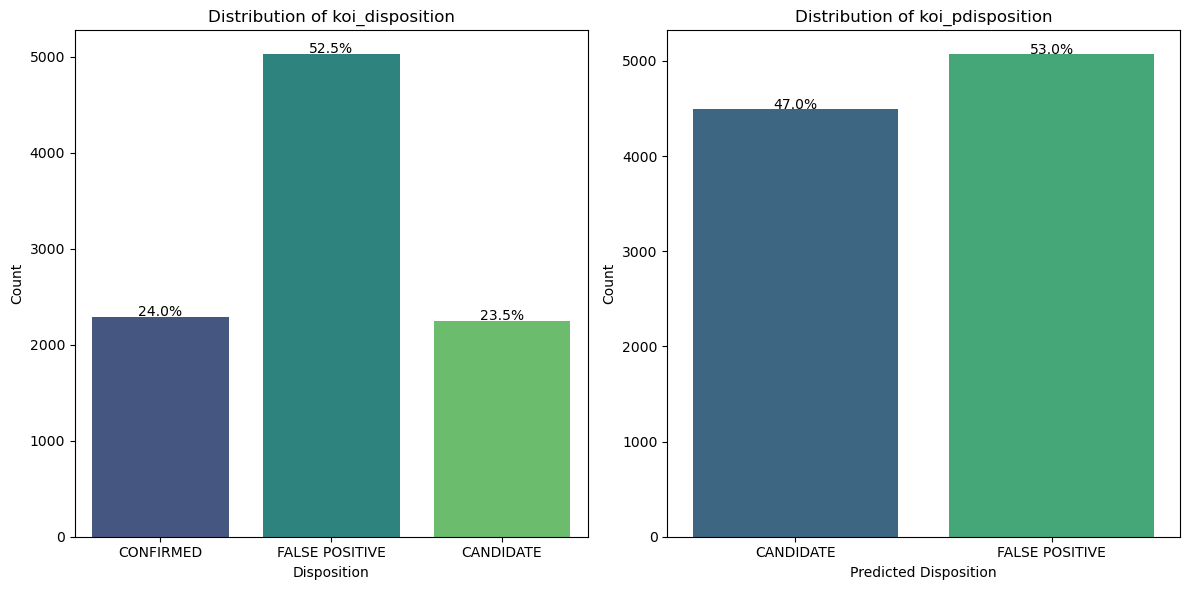

In [9]:
# Create count plots for 'koi_disposition' and 'koi_pdisposition' with percentage labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='koi_disposition', data=df, palette='viridis')

# Annotate bars with percentage values
total = len(df['koi_disposition'])
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 10, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Distribution of koi_disposition')
plt.xlabel('Disposition')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='koi_pdisposition', data=df, palette='viridis')

# Annotate bars with percentage values
total = len(df['koi_pdisposition'])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.1f}%'.format((height / total) * 100), ha="center")

plt.title('Distribution of koi_pdisposition')
plt.xlabel('Predicted Disposition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## The graph illustrates that among the candidates identified as potential exoplanets, only 24% have been confirmed as genuine exoplanets. The remaining 76% retain their candidate status,either due to insufficient data or because they have been eliminated following rigorous

In [10]:
# Selecting the candidate features based on the 'koi_pdisposition' column.
candidate_df = df[df['koi_pdisposition'] == 'CANDIDATE'].copy()
# Removing koi_pdisposition as it only contain Candidate value.
candidate_df.pop('koi_pdisposition')
candidate_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [11]:
candidate_df.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,4496.000000,4.496000e+03,4496.000000,4496.0,4496.000000,4496.0,4496.0,4496.000000,4496.000000,4496.000000,...,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000,4496.000000
mean,3624.804938,7.951126e+06,0.896686,0.0,0.009342,0.0,0.0,78.197856,0.001218,-0.001218,...,-139.242052,4.371940,0.102199,-0.125564,1.315259,0.252234,-0.236023,291.365414,44.164454,14.341833
std,2572.339674,2.622547e+06,0.193339,0.0,0.096210,0.0,0.0,1941.182981,0.005280,0.005280,...,58.269717,0.319762,0.105316,0.080709,4.127041,0.429586,1.285863,4.809056,3.595658,1.266699
min,1.000000,7.574500e+05,0.001000,0.0,0.000000,0.0,0.0,0.259820,0.000000,-0.141600,...,-941.000000,0.114000,0.000000,-1.207000,0.109000,0.000000,-76.199000,280.249450,36.577381,7.748000
25%,1569.500000,5.956656e+06,0.922000,0.0,0.000000,0.0,0.0,5.082742,0.000017,-0.000301,...,-175.000000,4.279000,0.040000,-0.180000,0.819000,0.094000,-0.189000,287.619835,41.234703,13.605750
50%,3045.500000,8.226994e+06,0.997000,0.0,0.000000,0.0,0.0,12.072159,0.000064,-0.000064,...,-133.000000,4.447000,0.066000,-0.112000,0.982000,0.197000,-0.100000,291.581465,44.132905,14.621000
75%,5223.250000,1.001844e+07,1.000000,0.0,0.000000,0.0,0.0,35.194060,0.000301,-0.000017,...,-87.000000,4.548000,0.132000,-0.071750,1.248000,0.305000,-0.062000,295.227028,46.966638,15.319000
max,9562.000000,1.288521e+07,1.000000,0.0,1.000000,0.0,0.0,129995.778400,0.141600,0.000000,...,0.000000,5.364000,1.232000,0.000000,152.969000,15.454000,0.000000,301.720760,52.220341,17.475000


### After examining the dataset, it was observed that attributes such as 'koi_fpflag_nt', 'koi_fpflag_co', and 'koi_fpflag_ec' consistently have a value of zero for both candidate and confirmed dispositions. As a result, these attributes do not vary with respect to the predicted disposition ('p_disposition'). Therefore, it is deemed appropriate to drop these columns from the dataset

In [12]:
columns_to_drop = ['koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ec']
candidate_df.drop(columns=columns_to_drop, inplace=True)

In [13]:
candidate_df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_score,koi_fpflag_ss,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,1.000,0,9.488036,0.000028,-0.000028,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,0.969,0,54.418383,0.000248,-0.000248,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,1.000,0,2.525592,0.000004,-0.000004,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,1.000,0,11.094321,0.000020,-0.000020,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,1.000,0,4.134435,0.000010,-0.000010,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [14]:
# Convert categorical variables into numerical variables
disposition_map = {'CANDIDATE': 0, 'FALSE POSITIVE': 1, 'NOT DISPOSITIONED': 2, 'CONFIRMED': 3}
mapped_df = candidate_df.copy()
mapped_df['koi_disposition'] = mapped_df['koi_disposition'].map(disposition_map)

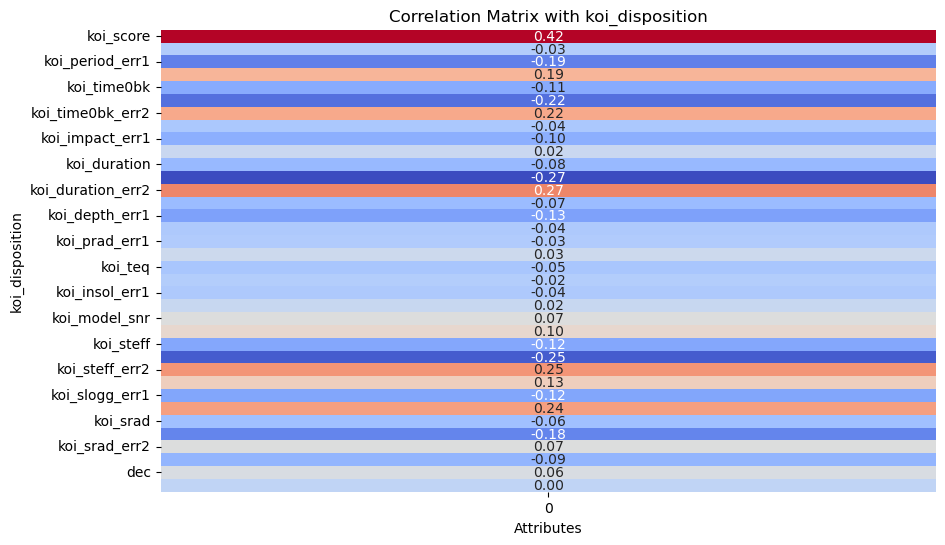

In [15]:
numerical_columns = mapped_df.select_dtypes(include=['float64']).columns

# Calculating correlation matrix
correlation_matrix = mapped_df[numerical_columns].corrwith(mapped_df['koi_disposition'])
high_correlation_columns = correlation_matrix[abs(correlation_matrix) > 0.25].index

# Plotting correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.to_frame(), cmap='coolwarm', annot=True, cbar=False, fmt =".2f")
plt.title('Correlation Matrix with koi_disposition')
plt.xlabel('Attributes')
plt.ylabel('koi_disposition')
plt.show()

## The analysis reveals that 'koi_score' exhibits the highest correlation coefficient among the features considered, with a value of 0.42. However, for the majority of attributes, there exists no significant correlation with 'koi_disposition', except for a few notable outliers.

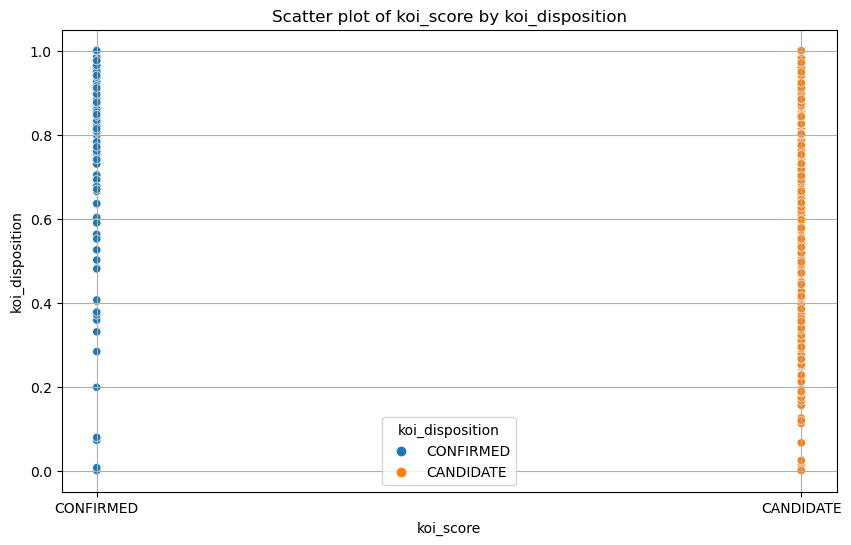

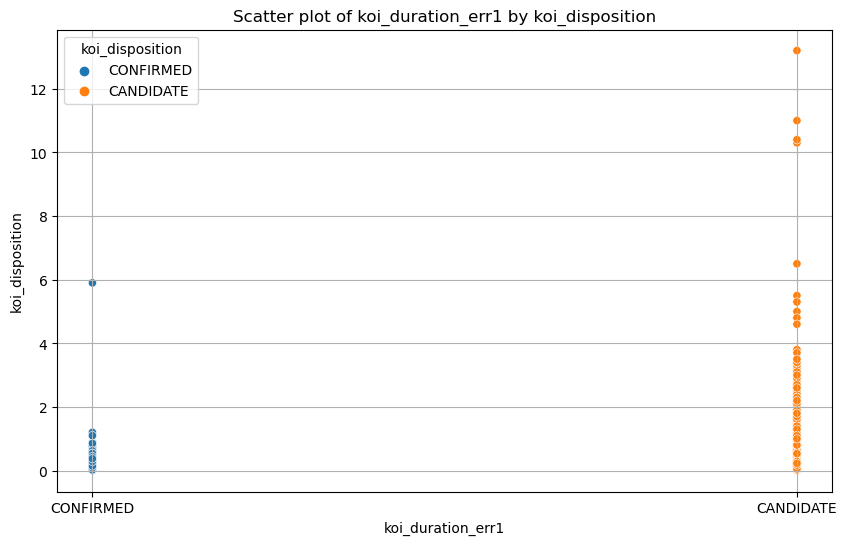

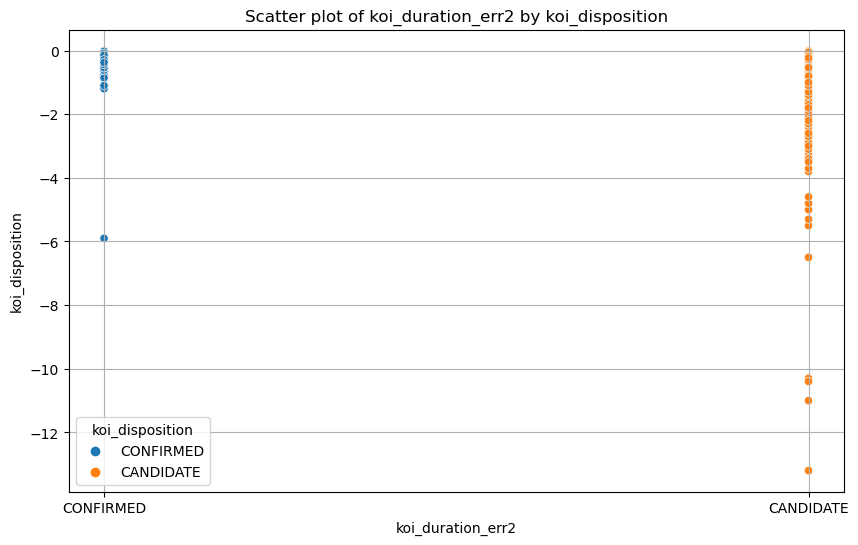

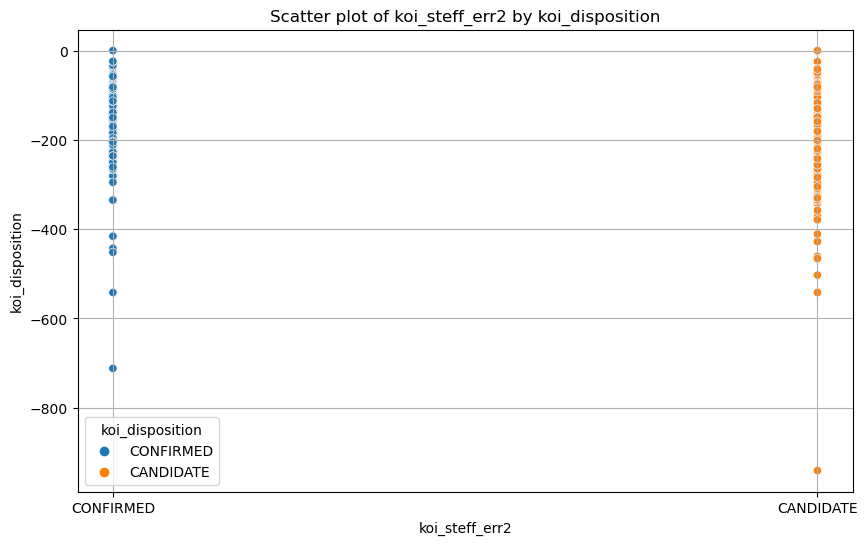

In [16]:
#plotting scatter-plot for high-correlation columns with koi_disposition
for column in high_correlation_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=candidate_df,y=column, x='koi_disposition', hue='koi_disposition')
    plt.title(f'Scatter plot of {column} by koi_disposition')
    plt.xlabel(column)
    plt.ylabel('koi_disposition')
    plt.legend(title='koi_disposition')
    plt.grid(True)
    plt.show()

## The analysis reveals attributes with correlation factors higher than 0.25, where 'koi_score' exceeding 0.4 significantly increases the probability of confirmation. Additionally, instances where 'koi_duration_err1' is below 1 tend to be confirmed, with a single outlier observed at 6. Similarly, 'koi_duration_err2' supportsconfirmation until values of -1, with outliers noted at -6. Lastly, 'koi_steff_err2' demonstrates confirmation trends up to -300, albeit with some outliers.